####                                                        X EDUCATION SYSTEM CASE STUDY

In [1]:
# importing the Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

### Reading the data

In [2]:
# Reading the csv file
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


####  Inspect the Dataframe

In [3]:
# Checking the number of rows and columns in the dataframe
lead.shape

(9240, 37)

In [4]:
# Checking the column-wise info of the dataframe

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
# Checking the summary 
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
lead.describe(include= 'all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,bd717cec-a836-4856-8dcd-d8fd362fcea9,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


### Data analysis

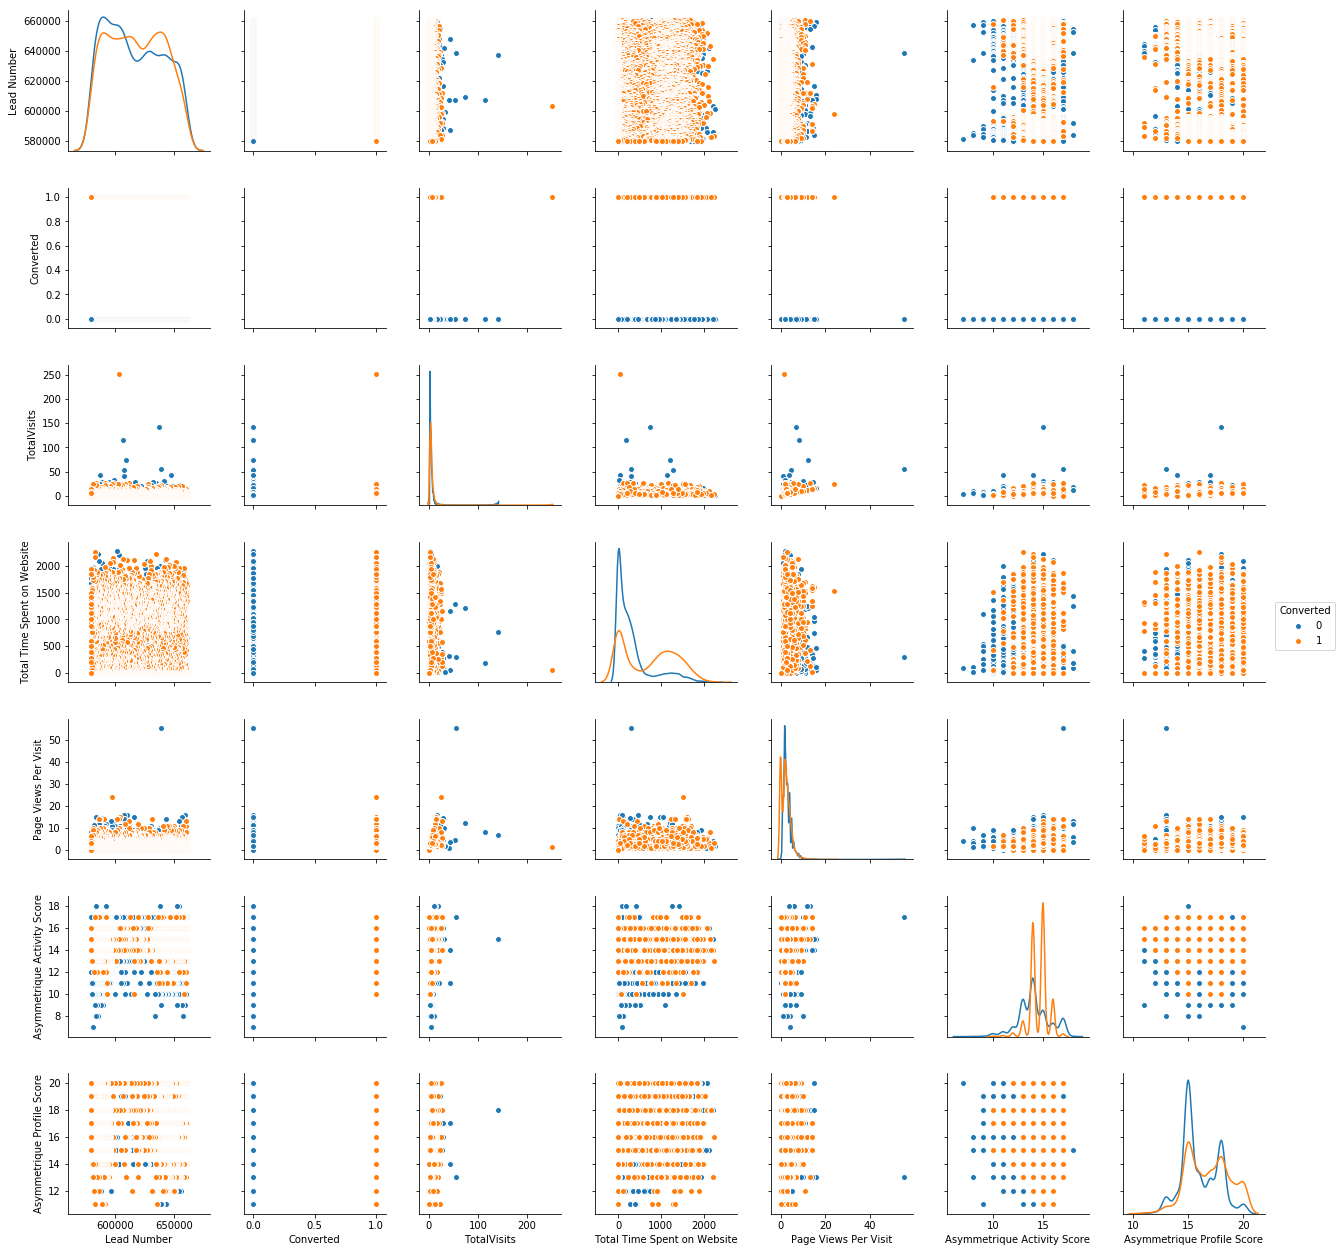

In [7]:
# Pairplot for all numerical columns
sns.pairplot(lead,diag_kind='kde', hue='Converted')
plt.show()

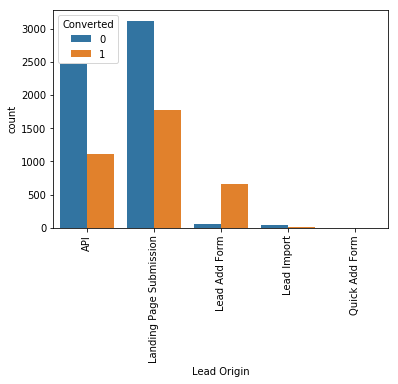

In [8]:
# Lead Origin: The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

# inference: landing page submission has the most number of convertion but at the time we can see lead Add form give us better results in terms of convertion rate. 

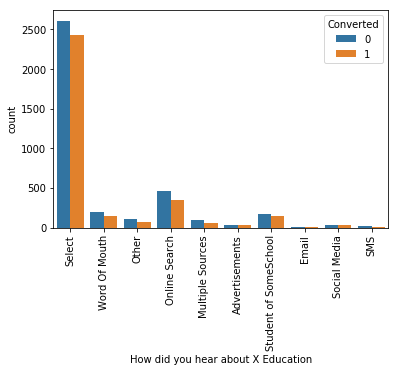

In [9]:
# How did you hear about X Education - 
sns.countplot(x = 'How did you hear about X Education', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

# inference: online search should be given more attention as there is most number of traffic.

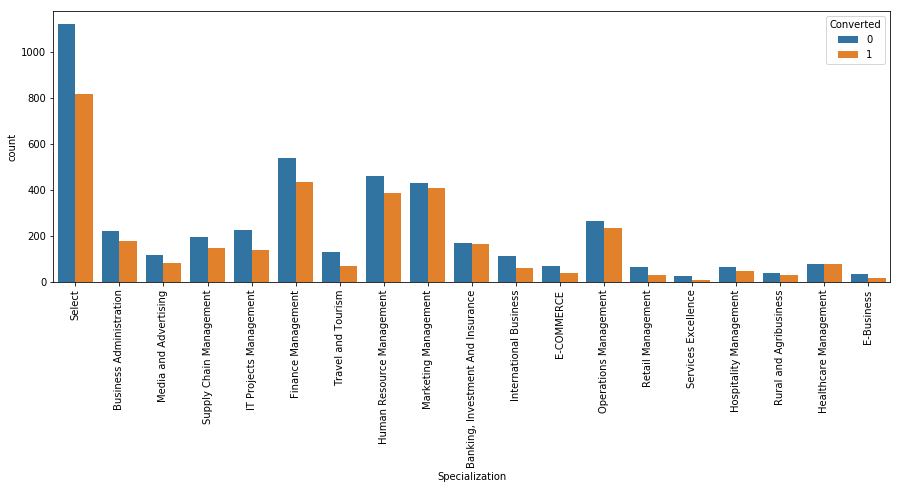

In [10]:
#Specialization
plt.figure(figsize=(15,5))
sns.countplot(x = 'Specialization', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

# inference: The domain which should be focused are finance, human resource, banking,operations. These columns seems to have hgh convertion rate

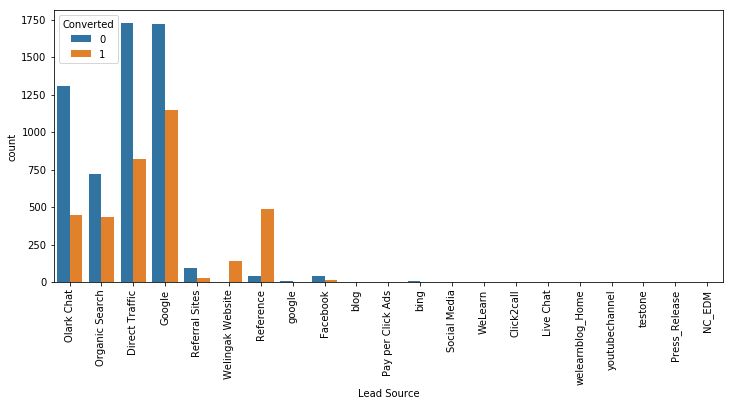

In [11]:
# Lead Source: The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
plt.figure(figsize=(12,5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

In [12]:
# converting the variables in Lead Source  which has no significance
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

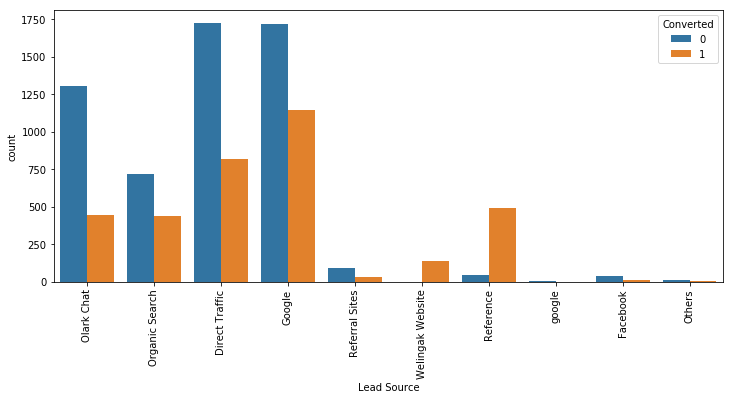

In [13]:
# The source of the lead.
plt.figure(figsize=(12,5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

# inference: It is more profiltabe to focus on referrals and welingak website as there is very less instances where leads have not converted. 

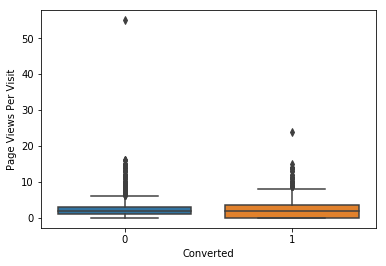

In [14]:
# Page Views Per Visit
sns.boxplot( x = 'Converted', y = 'Page Views Per Visit', data = lead)
plt.show()
#inference:The medians are on the same level converted as well as nn converted.

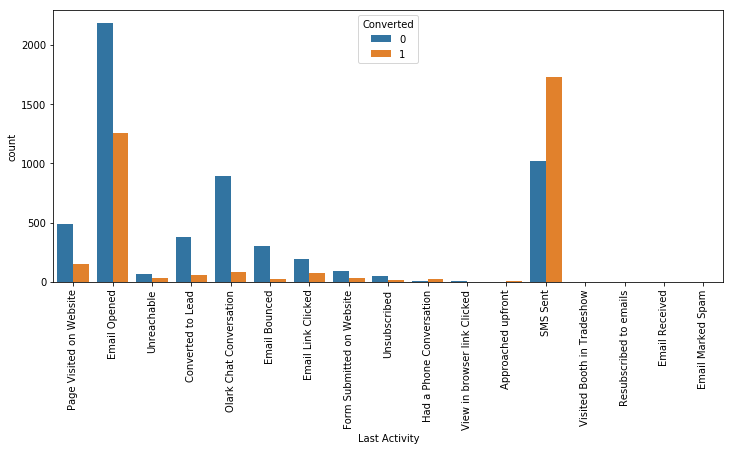

In [15]:
# Last Activity: Last activity performed by the customer. 
plt.figure(figsize=(12,5))
sns.countplot(x = 'Last Activity', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

#inference: It is surprising to see lead who have sent SMS has the highest convertion rate, lead with email opened status also have good convertion but at the same time has the highest not converted ones

In [16]:
# converting the variables in last activity which has no significance
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

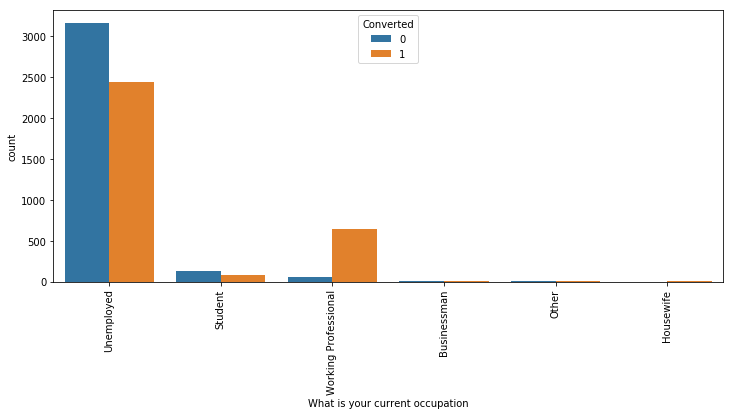

In [17]:
# What is your current occupation
plt.figure(figsize=(12,5))
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

#inference: The unemployed have highest number of leads but it is the working proffesional who have converted the most in terms of ratio. 

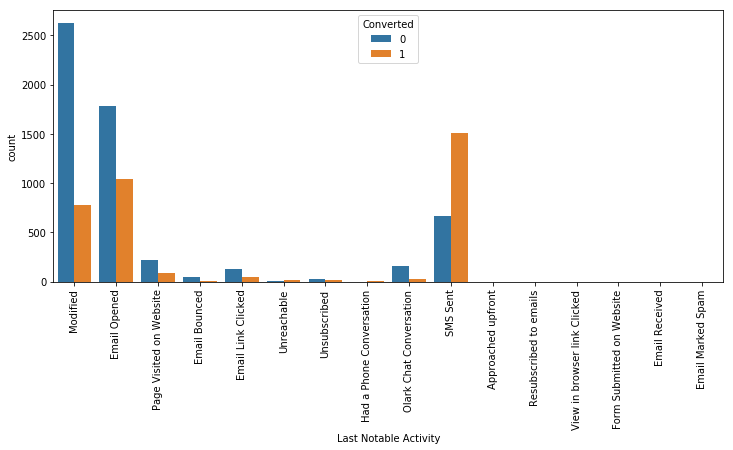

In [18]:
# Last Notable Activity: The last notable acitivity performed by the student.

plt.figure(figsize=(12,5))
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

# inference: Students can be seen to be converted most by SMS.

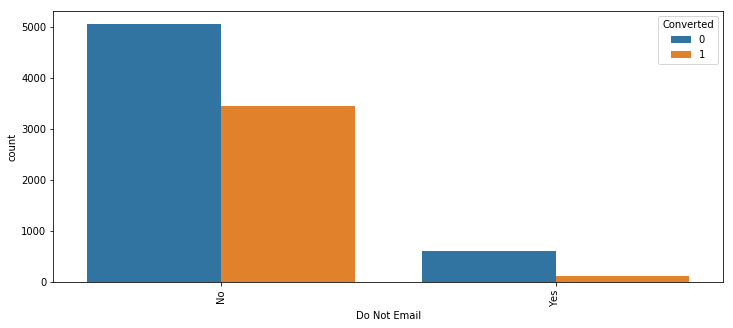

In [19]:
# Do Not Email
plt.figure(figsize=(12,5))
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

# inference : The medians are on the same level converted as well as in not converted.

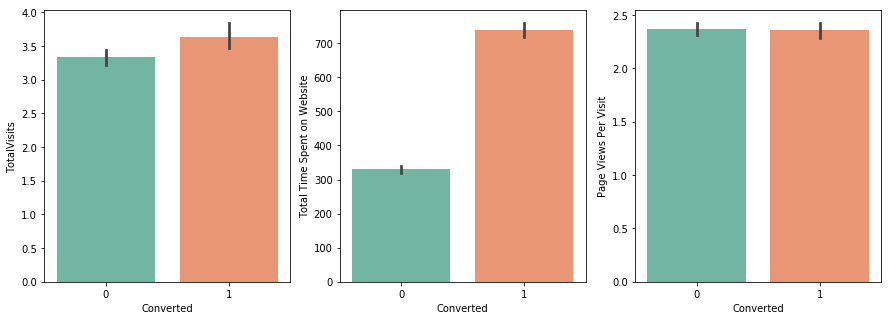

In [20]:
# Now check the conversions for all numeric values

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = lead)
plt.subplot(1,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = lead)
plt.subplot(1,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = lead)
plt.show()

#### Outlier Treatment

In [21]:
# Checking outliers at 25%,50%,75%,90%,95% and above
lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000


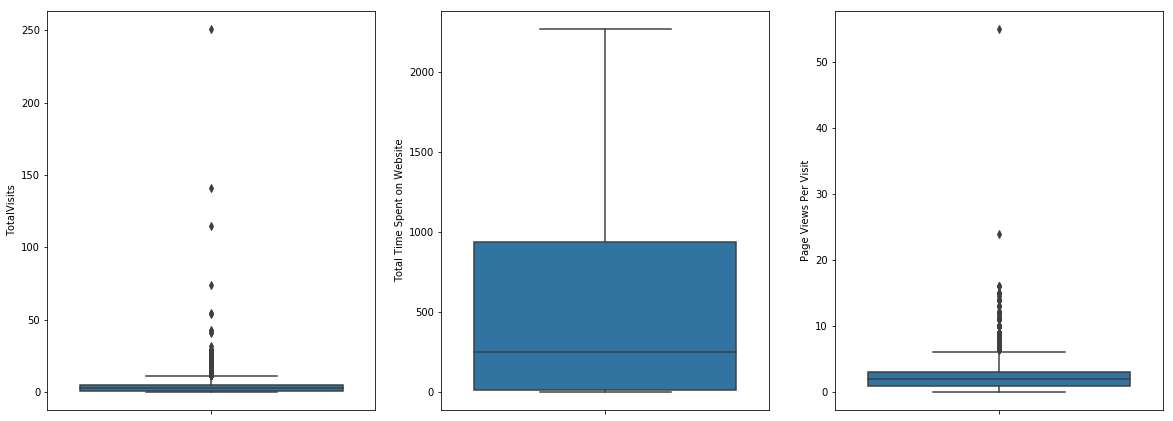

In [22]:
#Checking  outliers in  columns
plt.figure(figsize=(20, 25))
plt.subplot(3,3,1)
sns.boxplot(y = 'TotalVisits', data = lead)
plt.subplot(3,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = lead)
plt.subplot(3,3,3)
sns.boxplot(y = 'Page Views Per Visit',  data = lead)
plt.show()

In [23]:
# Removing values beyond 99% for Total Visits
total_visits = lead['TotalVisits'].quantile(0.99)
lead = lead[lead["TotalVisits"] < total_visits]
# Removing values beyond 99% for page Views Per Visit
page_visits = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead["Page Views Per Visit"] < page_visits]


In [24]:
# Checking outliers at 25%,50%,75%,90%,95% and above
lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,4803.000000,4803.000000
mean,617059.278677,0.379780,3.088507,476.563878,2.229871,14.297314,16.329169
std,23301.503938,0.485359,2.822722,544.325819,1.837171,1.385911,1.797227
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596446.750000,0.000000,1.000000,3.750000,1.000000,14.000000,15.000000
50%,615467.000000,0.000000,3.000000,239.000000,2.000000,14.000000,16.000000
75%,637131.750000,1.000000,4.000000,908.250000,3.000000,15.000000,18.000000
90%,650163.800000,1.000000,7.000000,1370.000000,5.000000,16.000000,19.000000
95%,655264.500000,1.000000,8.000000,1553.000000,6.000000,17.000000,20.000000
99%,659555.630000,1.000000,13.000000,1837.180000,7.000000,17.000000,20.000000


### Data Cleaning

In [25]:
# Null Values in data in percentage
round((lead.isnull().sum()/len(lead.index)*100), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.33
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          26.11
Specialization                                   15.99
How did you hear about X Education               24.25
What is your current occupation                  29.59
What matters most to you in choosing a course    29.79
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [26]:
# dropping all null value columns greater than 3000
for col in lead.columns:
    if lead[col].isnull().sum() > 3000:
        lead.drop(col,1,inplace=True)

In [27]:
round((lead.isnull().sum()/len(lead.index)*100), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.33
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          26.11
Specialization                                   15.99
How did you hear about X Education               24.25
What is your current occupation                  29.59
What matters most to you in choosing a course    29.79
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [28]:
# dropping City and Country columns 
lead.drop(['City','Country'],axis = 1,inplace=True)

In [29]:
# value count of all the collumns
for column in lead:
    print(lead[column].astype('category').value_counts())

fffb0e5e-9f92-4017-9f42-781a69da4154    1
539366d9-f633-455a-99e4-dbc5907db28e    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
539eb309-df36-4a89-ac58-6d3651393910    1
5398e7ff-74db-4074-89fb-4fd9a603f521    1
53953744-234a-4cb9-9af4-bcc47eb472f4    1
5390c5fe-b12c-4f6e-ae92-908672abb0a1    1
535fe2da-f6ab-42b3-bdf3-b225a435d94b    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
53690d88-52f0-4ce5-b6b8-a13570a6db35    1
53c4e210-3344-4737-813f-74ef9a747ab6    1
53dbb914-71e7-458a-9749-cfb4d655eac2    1
53dd16bd-8201-448d-8e20-97de1cf44a7f    1
53e64fef-c5c6-4d03-b07a-8ccde69a6218    1
53eb261a-c8a8-410b-9110-3025d9ac5d22    1
53ef2d0f-c083-4629-a434-e0693f5fdf69    1
53f209d0-d223-4d29-b1e4-4f001dc10933    1
53f609d7-aa80-448a-b461-7a70d1d8de

In [30]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [31]:
# checking Value counts of the columns below
lead['Lead Profile'].value_counts()

Select                         3971
Potential Lead                 1524
Other Leads                     472
Student of SomeSchool           238
Dual Specialization Student      20
Lateral Student                  18
Name: Lead Profile, dtype: int64

In [32]:
lead['Specialization'].value_counts()

Select                               1854
Finance Management                    942
Human Resource Management             809
Marketing Management                  808
Operations Management                 492
Business Administration               388
IT Projects Management                357
Supply Chain Management               333
Banking, Investment And Insurance     319
Media and Advertising                 195
Travel and Tourism                    187
International Business                171
Healthcare Management                 150
E-COMMERCE                            106
Hospitality Management                105
Retail Management                      94
Rural and Agribusiness                 69
E-Business                             54
Services Excellence                    37
Name: Specialization, dtype: int64

In [33]:
lead['How did you hear about X Education'].value_counts()

Select                   4792
Online Search             784
Word Of Mouth             342
Student of SomeSchool     306
Other                     180
Multiple Sources          151
Advertisements             67
Social Media               65
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [34]:
# How did you hear about X Education,Lead Profile columms dropped as there are too many "Select" in it.
lead.drop(['How did you hear about X Education','Lead Profile'],axis = 1,inplace=True)

In [35]:
# These columns  are not usefull for this analysis dropping the columns
lead.drop(['Do Not Call', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],axis = 1,inplace=True)

In [36]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [37]:
# dropping becouse of zero variance
lead.drop(['What matters most to you in choosing a course'],axis = 1,inplace=True)

In [38]:
round((lead.isnull().sum()/len(lead.index)*100), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.33
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                            15.99
What is your current occupation           29.59
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [39]:
lead.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 29
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1422
What is your current occupation           2631
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [40]:
lead = lead[~pd.isnull(lead['What is your current occupation'])]
lead.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [41]:
lead = lead[~pd.isnull(lead['Lead Source'])]
lead.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [42]:
lead = lead[~pd.isnull(lead['Specialization'])]
lead.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [43]:
round((lead.isnull().sum()/len(lead.index)*100), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [44]:
lead.shape

(6214, 14)

In [45]:
# Prospect ID, Lead Number not required so dropping them 
lead.drop(['Prospect ID','Lead Number'],axis = 1,inplace=True)

### Data Preparation 

In [46]:
# Creating dummies for variables

lead_or=pd.get_dummies(lead['Lead Origin'],prefix='lead_origin')
#lead_or.drop('lead_origin_Quick Add Form',axis=1,inplace=True)
lead=pd.concat([lead,lead_or],axis=1)

lead_sor=pd.get_dummies(lead['Lead Source'],prefix='lead_source')
#lead_sor.drop('lead_source_NC_EDM',axis=1,inplace=True)
lead=pd.concat([lead,lead_sor],axis=1)

d_last_activity = pd.get_dummies(lead['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
#d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master leadframe
lead = pd.concat([lead,d_last_activity], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(lead['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master leadframe
lead = pd.concat([lead,d_curr_occupation1], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(lead['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
#d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master leadframe
lead = pd.concat([lead,d_last_notable_activity], axis=1)

In [47]:
lead.shape

(6214, 55)

In [48]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [49]:
# dropping columns from lead
lead.drop([ 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity','Specialization'], axis=1,inplace=True)

In [50]:
lead.drop(['Do Not Email','A free copy of Mastering The Interview'],axis=1,inplace=True)
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,...,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:

temp=lead.loc[:,lead.dtypes=='object']
lead.dtypes

Converted                                             int64
TotalVisits                                         float64
Total Time Spent on Website                           int64
Page Views Per Visit                                float64
lead_origin_API                                       uint8
lead_origin_Landing Page Submission                   uint8
lead_origin_Lead Add Form                             uint8
lead_origin_Lead Import                               uint8
lead_source_Direct Traffic                            uint8
lead_source_Facebook                                  uint8
lead_source_Google                                    uint8
lead_source_Olark Chat                                uint8
lead_source_Organic Search                            uint8
lead_source_Others                                    uint8
lead_source_Reference                                 uint8
lead_source_Referral Sites                            uint8
lead_source_Welingak Website            

##### Test-Train Split

In [52]:
# importing liabrary 
from sklearn.model_selection import train_test_split

X=lead.drop('Converted',axis=1)
# Putting target variable to y
y=lead['Converted']

In [53]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
y_pred=log.predict_proba(X_train)
y_pred

array([[0.88651683, 0.11348317],
       [0.70460973, 0.29539027],
       [0.85696899, 0.14303101],
       ...,
       [0.5327514 , 0.4672486 ],
       [0.944372  , 0.055628  ],
       [0.2776903 , 0.7223097 ]])

In [54]:
# Rescaling the features with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [55]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [56]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,...,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
1960,-1.138927,-0.931959,-1.281680,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9237,-0.439126,-0.575493,-0.187489,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8518,-0.439126,-0.476972,-0.187489,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3187,-1.138927,-0.931959,-1.281680,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2099,-0.439126,0.651537,-0.187489,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


### Model Building

#### Model with All Variables

In [57]:
# importing liabrary statsmodels
import statsmodels.api as sm
# adding constants to x train
log1=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4349
Model:                            GLM   Df Residuals:                     4308
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 10 Jan 2021   Deviance:                          nan
Time:                        22:14:56   Pearson chi2:                 5.68e+18
No. Iterations:                   100   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             1.392e+15   2.36e+07   5.89e+07      0.000    1.39e+15    1.39e+15
TotalVisits                                       1.469e+14   1.43e+06   1.03e+08      0.000    1.47e+14    1.47e+14
Total Time Spent on Website                       6.505e+14   1.09e+06   5.99e+08      0.000     6.5e+14     6.5e+14
Page Views Per Visit                             -1.107e+14   1.68e+06  -6.57e+07      0.000   -1.11e+14   -1.11e+14
lead_origin_API                                  -1.009e+15   1.85e+07  -5.45e+07      0.000   -1.01e+15   -1.01e+15
lead_origin_Landing Page Submission              -9.744e+14   1.85e+07  -5.26e+07      0.000   -9.74e+14   -9.74e+14
lead_origin_Lead Add Form                        -1.191e+15   2.89e+07  -4.13e+07      0.000   -1.19e+15   -1.19e+15
lead_origin_Lead Import                           4.566e+15   5.43e+07    8.4e+07      0.000    4.57e+15    4.57e+15
lead_source_Direct Traffic                        1.158e+14   1.23e+07   9.43e+06      0.000    1.16e+14    1.16e+14
lead_source_Facebook                              -5.14e+15   5.99e+07  -8.58e+07      0.000   -5.14e+15   -5.14e+15
lead_source_Google                                3.765e+14   1.22e+07   3.07e+07      0.000    3.77e+14    3.77e+14
lead_source_Olark Chat                            1.145e+15   1.26e+07   9.08e+07      0.000    1.15e+15    1.15e+15
lead_source_Organic Search                        4.736e+13   1.24e+07   3.81e+06      0.000    4.74e+13    4.74e+13
lead_source_Others                                8.866e+14   2.04e+07   4.35e+07      0.000    8.87e+14    8.87e+14
lead_source_Reference                             2.322e+15   2.51e+07   9.23e+07      0.000    2.32e+15    2.32e+15
lead_source_Referral Sites                       -1.309e+14   1.51e+07  -8.67e+06      0.000   -1.31e+14   -1.31e+14
lead_source_Welingak Website                      1.769e+15   2.57e+07   6.87e+07      0.000    1.77e+15    1.77e+15
LastActivity_Converted to Lead                   -4.863e+14   6.08e+06     -8e+07      0.000   -4.86e+14   -4.86e+14
LastActivity_Email Bounced                       -1.869e+14   7.62e+06  -2.45e+07      0.000   -1.87e+14   -1.87e+14
LastActivity_Email Link Clicked                   5.047e+14   9.99e+06   5.05e+07      0.000    5.05e+14    5.05e+14
LastActivity_Email Opened                         8.497e+14   5.48e+06   1.55e+08      0.000     8.5e+14     8.5e+14
LastActivity_Form Submitted on Website           -1.387e+14    9.4e+06  -1.47e+07      0.000   -1.39e+14   -1.39e+14
LastActivity_Olark Chat Conversation               4.93e+14   5.88e+06   8.38e+07      0.000    4.93e+14    4.93e+14
LastActivity_Other_Activity                       6.163e+14   1.86e+07   3.31e+07      0.000    6.16e+14    6.16e+14
Las

#### Feature Selection using RFE

In [58]:
# Feature Selection Using RFE
from sklearn.feature_selection import RFE
rfe=RFE(log,20) # choosing 20 variables
rfe=rfe.fit(X_train,y_train)

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('lead_origin_API', True, 1),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_origin_Lead Add Form', True, 1),
 ('lead_origin_Lead Import', False, 20),
 ('lead_source_Direct Traffic', False, 7),
 ('lead_source_Facebook', False, 17),
 ('lead_source_Google', False, 12),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', False, 11),
 ('lead_source_Others', True, 1),
 ('lead_source_Reference', False, 3),
 ('lead_source_Referral Sites', False, 9),
 ('lead_source_Welingak Website', True, 1),
 ('LastActivity_Converted to Lead', False, 22),
 ('LastActivity_Email Bounced', True, 1),
 ('LastActivity_Email Link Clicked', False, 4),
 ('LastActivity_Email Opened', True, 1),
 ('LastActivity_Form Submitted on Website', False, 23),
 ('LastActivity_Olark Chat Conversation', True, 1),
 ('LastActivity_Other_Activity', True, 1),
 ('LastActivity_Page Visited on Websit

#### Selected Columns

In [60]:
col=X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'lead_origin_API',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_source_Olark Chat', 'lead_source_Others',
       'lead_source_Welingak Website', 'LastActivity_Email Bounced',
       'LastActivity_Email Opened', 'LastActivity_Olark Chat Conversation',
       'LastActivity_Other_Activity', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_Student',
       'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified', 'LastNotableActivity_Unreachable'],
      dtype='object')

#### Model 1 - With All variables

In [61]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4349
Model:                            GLM   Df Residuals:                     4328
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1979.1
Date:                Sun, 10 Jan 2021   Deviance:                       3958.1
Time:                        22:14:57   Pearson chi2:                 4.54e+03
No. Iterations:                    21   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.3307      0.868      0.381      0.703      -1.370       2.032
Total Time Spent on Website                      1.1108      0.048     23.282      0.000       1.017       1.204
lead_origin_API                                 -0.6372      0.520     -1.226      0.220      -1.656       0.382
lead_origin_Landing Page Submission             -0.9629      0.515     -1.868      0.062      -1.973       0.047
lead_origin_Lead Add Form                        2.5038      0.548      4.571      0.000       1.430       3.577
lead_source_Olark Chat                           1.2285      0.141      8.713      0.000       0.952       1.505
lead_source_Others                               1.0069      0.794      1.269      0.205      -0.549       2.562
lead_source_Welingak Website                     1.9950      0.751      2.658      0.008       0.524       3.466
LastActivity_Email Bounced                      -1.5617      0.412     -3.788      0.000      -2.370      -0.754
LastActivity_Email Opened                        0.9493      0.187      5.089      0.000       0.584       1.315
LastActivity_Olark Chat Conversation            -0.5661      0.218     -2.593      0.010      -0.994      -0.138
LastActivity_Other_Activity                      1.1535      0.702      1.644      0.100      -0.222       2.529
LastActivity_SMS Sent                            1.3008      0.139      9.352      0.000       1.028       1.573
CurrentOccupation_Housewife                     21.5887      2e+04      0.001      0.999   -3.92e+04    3.92e+04
CurrentOccupation_Student                       -0.6779      0.719     -0.942      0.346      -2.088       0.732
CurrentOccupation_Unemployed                    -0.6281      0.687     -0.915      0.360      -1.974       0.718
CurrentOccupation_Working Professional           2.0630      0.713      2.895      0.004       0.666       3.460
LastNotableActivity_Email Opened                -0.5977      0.204     -2.925      0.003      -0.998      -0.197
LastNotableActivity_Had a Phone Conversation    22.1499   1.48e+04      0.001      0.999    -2.9e+04    2.91e+04
LastNotableActivity_Modified                    -0.8058      0.132     -6.122      0.000      -1.064      -0.548
LastNotableActivity_Unreachable                  3.5171      1.074      3.275      0.001       1.412       5.622
================================================================================================================
"""

In [62]:
# dropping as very high p-value
col=col.drop('CurrentOccupation_Housewife',1)

#### Model 2

In [63]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4349
Model:                            GLM   Df Residuals:                     4329
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1980.4
Date:                Sun, 10 Jan 2021   Deviance:                       3960.9
Time:                        22:14:58   Pearson chi2:                 4.55e+03
No. Iterations:                    21   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.7770      0.796      0.977      0.329      -0.782       2.336
Total Time Spent on Website                      1.1115      0.048     23.296      0.000       1.018       1.205
lead_origin_API                                 -0.6407      0.520     -1.232      0.218      -1.660       0.378
lead_origin_Landing Page Submission             -0.9616      0.515     -1.866      0.062      -1.972       0.049
lead_origin_Lead Add Form                        2.5106      0.548      4.584      0.000       1.437       3.584
lead_source_Olark Chat                           1.2312      0.141      8.731      0.000       0.955       1.508
lead_source_Others                               1.0079      0.794      1.269      0.204      -0.548       2.564
lead_source_Welingak Website                     1.9887      0.751      2.649      0.008       0.518       3.460
LastActivity_Email Bounced                      -1.5602      0.412     -3.784      0.000      -2.368      -0.752
LastActivity_Email Opened                        0.9609      0.186      5.162      0.000       0.596       1.326
LastActivity_Olark Chat Conversation            -0.5679      0.218     -2.600      0.009      -0.996      -0.140
LastActivity_Other_Activity                      1.1570      0.702      1.648      0.099      -0.219       2.533
LastActivity_SMS Sent                            1.3015      0.139      9.360      0.000       1.029       1.574
CurrentOccupation_Student                       -1.1251      0.631     -1.784      0.074      -2.361       0.111
CurrentOccupation_Unemployed                    -1.0751      0.593     -1.813      0.070      -2.238       0.087
CurrentOccupation_Working Professional           1.6159      0.623      2.594      0.009       0.395       2.837
LastNotableActivity_Email Opened                -0.6088      0.204     -2.984      0.003      -1.009      -0.209
LastNotableActivity_Had a Phone Conversation    22.1480   1.48e+04      0.001      0.999    -2.9e+04    2.91e+04
LastNotableActivity_Modified                    -0.8087      0.132     -6.144      0.000      -1.067      -0.551
LastNotableActivity_Unreachable                  3.5163      1.074      3.274      0.001       1.411       5.621
================================================================================================================
"""

In [64]:
col=col.drop('LastNotableActivity_Had a Phone Conversation',1)

#### Model 3

In [65]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4349
Model:                            GLM   Df Residuals:                     4330
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1983.4
Date:                Sun, 10 Jan 2021   Deviance:                       3966.8
Time:                        22:14:58   Pearson chi2:                 4.55e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.7956      0.795      1.000      0.317      -0.763       2.355
Total Time Spent on Website                1.1098      0.048     23.273      0.000       1.016       1.203
lead_origin_API                           -0.6406      0.520     -1.232      0.218      -1.660       0.378
lead_origin_Landing Page Submission       -0.9614      0.515     -1.865      0.062      -1.971       0.049
lead_origin_Lead Add Form                  2.5084      0.548      4.580      0.000       1.435       3.582
lead_source_Olark Chat                     1.2263      0.141      8.703      0.000       0.950       1.502
lead_source_Others                         1.0076      0.794      1.268      0.205      -0.549       2.565
lead_source_Welingak Website               1.9889      0.751      2.650      0.008       0.518       3.460
LastActivity_Email Bounced                -1.5622      0.412     -3.789      0.000      -2.370      -0.754
LastActivity_Email Opened                  0.9719      0.186      5.221      0.000       0.607       1.337
LastActivity_Olark Chat Conversation      -0.5621      0.219     -2.572      0.010      -0.990      -0.134
LastActivity_Other_Activity                1.9909      0.577      3.452      0.001       0.860       3.121
LastActivity_SMS Sent                      1.2892      0.139      9.287      0.000       1.017       1.561
CurrentOccupation_Student                 -1.1273      0.631     -1.788      0.074      -2.363       0.109
CurrentOccupation_Unemployed              -1.0765      0.593     -1.815      0.069      -2.239       0.086
CurrentOccupation_Working Professional     1.6126      0.623      2.589      0.010       0.392       2.833
LastNotableActivity_Email Opened          -0.6359      0.204     -3.123      0.002      -1.035      -0.237
LastNotableActivity_Modified              -0.8356      0.131     -6.377      0.000      -1.092      -0.579
LastNotableActivity_Unreachable            3.4989      1.074      3.258      0.001       1.394       5.604
==========================================================================================================
"""

In [66]:
col=col.drop('CurrentOccupation_Student',1)

#### Model 4

In [67]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4349
Model:                            GLM   Df Residuals:                     4331
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1985.0
Date:                Sun, 10 Jan 2021   Deviance:                       3970.0
Time:                        22:14:58   Pearson chi2:                 4.55e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.1928      0.570     -0.338      0.735      -1.311       0.925
Total Time Spent on Website                1.1101      0.048     23.285      0.000       1.017       1.204
lead_origin_API                           -0.6363      0.520     -1.224      0.221      -1.655       0.383
lead_origin_Landing Page Submission       -0.9618      0.515     -1.866      0.062      -1.972       0.048
lead_origin_Lead Add Form                  2.5086      0.548      4.581      0.000       1.435       3.582
lead_source_Olark Chat                     1.2182      0.141      8.653      0.000       0.942       1.494
lead_source_Others                         1.0062      0.794      1.267      0.205      -0.550       2.563
lead_source_Welingak Website               1.9882      0.751      2.649      0.008       0.517       3.459
LastActivity_Email Bounced                -1.5669      0.412     -3.802      0.000      -2.375      -0.759
LastActivity_Email Opened                  0.9675      0.186      5.201      0.000       0.603       1.332
LastActivity_Olark Chat Conversation      -0.5649      0.218     -2.587      0.010      -0.993      -0.137
LastActivity_Other_Activity                1.9865      0.577      3.445      0.001       0.856       3.117
LastActivity_SMS Sent                      1.2869      0.139      9.278      0.000       1.015       1.559
CurrentOccupation_Unemployed              -0.0878      0.209     -0.420      0.675      -0.498       0.322
CurrentOccupation_Working Professional     2.6007      0.284      9.162      0.000       2.044       3.157
LastNotableActivity_Email Opened          -0.6320      0.203     -3.106      0.002      -1.031      -0.233
LastNotableActivity_Modified              -0.8310      0.131     -6.347      0.000      -1.088      -0.574
LastNotableActivity_Unreachable            3.5036      1.073      3.265      0.001       1.400       5.607
==========================================================================================================
"""

In [68]:
col=col.drop('CurrentOccupation_Unemployed',1)

#### Model 5

In [69]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4349
Model:                            GLM   Df Residuals:                     4332
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1985.1
Date:                Sun, 10 Jan 2021   Deviance:                       3970.2
Time:                        22:14:59   Pearson chi2:                 4.55e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2801      0.531     -0.528      0.598      -1.321       0.761
Total Time Spent on Website                1.1104      0.048     23.292      0.000       1.017       1.204
lead_origin_API                           -0.6334      0.520     -1.219      0.223      -1.652       0.385
lead_origin_Landing Page Submission       -0.9585      0.515     -1.860      0.063      -1.968       0.051
lead_origin_Lead Add Form                  2.5161      0.547      4.597      0.000       1.443       3.589
lead_source_Olark Chat                     1.2204      0.141      8.674      0.000       0.945       1.496
lead_source_Others                         1.0019      0.794      1.262      0.207      -0.555       2.558
lead_source_Welingak Website               1.9819      0.750      2.641      0.008       0.511       3.453
LastActivity_Email Bounced                -1.5685      0.412     -3.806      0.000      -2.376      -0.761
LastActivity_Email Opened                  0.9674      0.186      5.200      0.000       0.603       1.332
LastActivity_Olark Chat Conversation      -0.5603      0.218     -2.569      0.010      -0.988      -0.133
LastActivity_Other_Activity                1.9834      0.577      3.439      0.001       0.853       3.114
LastActivity_SMS Sent                      1.2843      0.139      9.270      0.000       1.013       1.556
CurrentOccupation_Working Professional     2.6852      0.200     13.419      0.000       2.293       3.077
LastNotableActivity_Email Opened          -0.6314      0.203     -3.103      0.002      -1.030      -0.233
LastNotableActivity_Modified              -0.8319      0.131     -6.356      0.000      -1.088      -0.575
LastNotableActivity_Unreachable            3.5008      1.073      3.262      0.001       1.398       5.604
==========================================================================================================
"""

In [70]:
col=col.drop('lead_origin_API',1)

#### Model 6

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4349
Model:                            GLM   Df Residuals:                     4333
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1985.8
Date:                Sun, 10 Jan 2021   Deviance:                       3971.6
Time:                        22:14:59   Pearson chi2:                 4.55e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9005      0.156     -5.761      0.000      -1.207      -0.594
Total Time Spent on Website                1.1049      0.047     23.317      0.000       1.012       1.198
lead_origin_Landing Page Submission       -0.3408      0.102     -3.334      0.001      -0.541      -0.140
lead_origin_Lead Add Form                  3.1269      0.226     13.825      0.000       2.684       3.570
lead_source_Olark Chat                     1.1985      0.139      8.602      0.000       0.925       1.472
lead_source_Others                         0.9943      0.793      1.253      0.210      -0.561       2.549
lead_source_Welingak Website               1.9819      0.750      2.641      0.008       0.511       3.453
LastActivity_Email Bounced                -1.5656      0.412     -3.801      0.000      -2.373      -0.758
LastActivity_Email Opened                  0.9712      0.186      5.222      0.000       0.607       1.336
LastActivity_Olark Chat Conversation      -0.5620      0.218     -2.579      0.010      -0.989      -0.135
LastActivity_Other_Activity                1.9785      0.576      3.434      0.001       0.849       3.108
LastActivity_SMS Sent                      1.2857      0.138      9.285      0.000       1.014       1.557
CurrentOccupation_Working Professional     2.6850      0.200     13.422      0.000       2.293       3.077
LastNotableActivity_Email Opened          -0.6274      0.203     -3.083      0.002      -1.026      -0.229
LastNotableActivity_Modified              -0.8292      0.131     -6.338      0.000      -1.086      -0.573
LastNotableActivity_Unreachable            3.4973      1.073      3.260      0.001       1.394       5.600
==========================================================================================================
"""

In [72]:
col=col.drop('lead_source_Others',1)

#### Model 7

In [73]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4349
Model:                            GLM   Df Residuals:                     4334
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1986.6
Date:                Sun, 10 Jan 2021   Deviance:                       3973.1
Time:                        22:14:59   Pearson chi2:                 4.55e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.8982      0.156     -5.749      0.000      -1.204      -0.592
Total Time Spent on Website                1.1038      0.047     23.306      0.000       1.011       1.197
lead_origin_Landing Page Submission       -0.3409      0.102     -3.335      0.001      -0.541      -0.141
lead_origin_Lead Add Form                  3.1323      0.226     13.860      0.000       2.689       3.575
lead_source_Olark Chat                     1.1938      0.139      8.574      0.000       0.921       1.467
lead_source_Welingak Website               1.9723      0.750      2.629      0.009       0.502       3.443
LastActivity_Email Bounced                -1.5661      0.412     -3.804      0.000      -2.373      -0.759
LastActivity_Email Opened                  0.9695      0.186      5.213      0.000       0.605       1.334
LastActivity_Olark Chat Conversation      -0.5555      0.218     -2.551      0.011      -0.982      -0.129
LastActivity_Other_Activity                1.9764      0.576      3.431      0.001       0.848       3.105
LastActivity_SMS Sent                      1.2855      0.138      9.287      0.000       1.014       1.557
CurrentOccupation_Working Professional     2.6821      0.200     13.409      0.000       2.290       3.074
LastNotableActivity_Email Opened          -0.6235      0.203     -3.065      0.002      -1.022      -0.225
LastNotableActivity_Modified              -0.8289      0.131     -6.338      0.000      -1.085      -0.573
LastNotableActivity_Unreachable            3.4950      1.073      3.258      0.001       1.392       5.598
==========================================================================================================
"""

### Checking the second condition while creating the model i.e. VIF

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,LastActivity_Email Opened,8.38
11,LastNotableActivity_Email Opened,8.22
1,lead_origin_Landing Page Submission,2.84
12,LastNotableActivity_Modified,2.16
9,LastActivity_SMS Sent,2.02
2,lead_origin_Lead Add Form,1.83
3,lead_source_Olark Chat,1.76
7,LastActivity_Olark Chat Conversation,1.42
4,lead_source_Welingak Website,1.29
0,Total Time Spent on Website,1.28


In [75]:
# dropping the column with high VIF ie.greater than 5
col=col.drop('LastNotableActivity_Email Opened',1)

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,lead_origin_Landing Page Submission,2.69
6,LastActivity_Email Opened,2.01
9,LastActivity_SMS Sent,2.01
2,lead_origin_Lead Add Form,1.82
3,lead_source_Olark Chat,1.74
11,LastNotableActivity_Modified,1.54
7,LastActivity_Olark Chat Conversation,1.37
4,lead_source_Welingak Website,1.29
0,Total Time Spent on Website,1.28
10,CurrentOccupation_Working Professional,1.20


#### Final Model

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4349
Model:                            GLM   Df Residuals:                     4335
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1991.2
Date:                Sun, 10 Jan 2021   Deviance:                       3982.4
Time:                        22:15:00   Pearson chi2:                 4.56e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0568      0.148     -7.124      0.000      -1.348      -0.766
Total Time Spent on Website                1.1027      0.047     23.327      0.000       1.010       1.195
lead_origin_Landing Page Submission       -0.3375      0.102     -3.307      0.001      -0.538      -0.137
lead_origin_Lead Add Form                  3.1539      0.226     13.931      0.000       2.710       3.598
lead_source_Olark Chat                     1.2109      0.139      8.695      0.000       0.938       1.484
lead_source_Welingak Website               1.9687      0.752      2.618      0.009       0.495       3.442
LastActivity_Email Bounced                -1.5444      0.411     -3.759      0.000      -2.350      -0.739
LastActivity_Email Opened                  0.5597      0.130      4.299      0.000       0.305       0.815
LastActivity_Olark Chat Conversation      -0.6016      0.216     -2.785      0.005      -1.025      -0.178
LastActivity_Other_Activity                1.9764      0.571      3.461      0.001       0.857       3.096
LastActivity_SMS Sent                      1.3989      0.134     10.441      0.000       1.136       1.662
CurrentOccupation_Working Professional     2.6827      0.200     13.427      0.000       2.291       3.074
LastNotableActivity_Modified              -0.5760      0.102     -5.670      0.000      -0.775      -0.377
LastNotableActivity_Unreachable            3.6498      1.072      3.405      0.001       1.549       5.751
==========================================================================================================
"""

In [78]:
# predicting the probability value on train set
y_train_pred=res.predict(X_train_sm)
y_train_pred.head()

1960    0.113937
9237    0.347510
8518    0.204139
3187    0.921889
2099    0.286118
dtype: float64

In [79]:
# creating the dataframe for converted and converted probability
y_pred_final=pd.DataFrame({'Converted':y_train,'Converted_prob':y_train_pred})
y_pred_final['ID']=y_train.index
y_pred_final.head()

,Converted,Converted_prob,ID
1960,0,0.113937,1960
9237,0,0.347510,9237
8518,1,0.204139,8518
3187,1,0.921889,3187
2099,0,0.286118,2099


#### Confusion Matrix

In [80]:
y_pred_final['Prediction']=y_pred_final['Converted_prob'].apply(lambda x:1 if x>0.5 else 0)
metrics.confusion_matrix(y_pred_final['Converted'],y_pred_final['Prediction'])

array([[1922,  356],
       [ 559, 1512]], dtype=int64)

#### ROC Curve

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

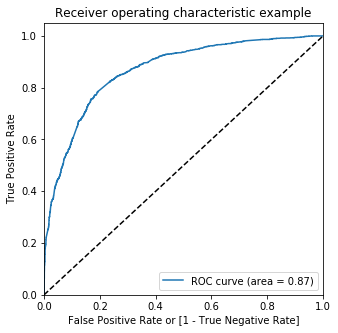

In [82]:
draw_roc(y_pred_final['Converted'], y_pred_final['Converted_prob'])

#### Finding the cut off value for the model

In [83]:
# created columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,Converted,Converted_prob,ID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1960,0,0.113937,1960,0,1,1,0,0,0,0,0,0,0,0
9237,0,0.347510,9237,0,1,1,1,1,0,0,0,0,0,0
8518,1,0.204139,8518,0,1,1,1,0,0,0,0,0,0,0
3187,1,0.921889,3187,1,1,1,1,1,1,1,1,1,1,1
2099,0,0.286118,2099,0,1,1,1,0,0,0,0,0,0,0


In [84]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.476201  1.000000  0.000000
0.1   0.1  0.574845  0.986480  0.200615
0.2   0.2  0.702920  0.942540  0.485075
0.3   0.3  0.763624  0.891840  0.647059
0.4   0.4  0.790067  0.833414  0.750658
0.5   0.5  0.789607  0.730082  0.843723
0.6   0.6  0.777650  0.672139  0.873573
0.7   0.7  0.742010  0.550942  0.915716
0.8   0.8  0.710968  0.447127  0.950834
0.9   0.9  0.651184  0.286818  0.982441


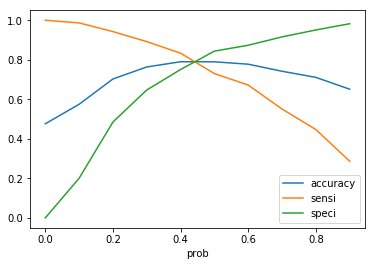

In [85]:
# plotting accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### After plotting the accuracy, sensitivity and specificity, we conclude from their meeting point that cut off value should be apporximately around 0.43 

In [86]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map( lambda x: 1 if x > 0.43 else 0)
y_pred_final.head()

,Converted,Converted_prob,ID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1960,0,0.113937,1960,0,1,1,0,0,0,0,0,0,0,0,0
9237,0,0.347510,9237,0,1,1,1,1,0,0,0,0,0,0,0
8518,1,0.204139,8518,0,1,1,1,0,0,0,0,0,0,0,0
3187,1,0.921889,3187,1,1,1,1,1,1,1,1,1,1,1,1
2099,0,0.286118,2099,0,1,1,1,0,0,0,0,0,0,0,0


#### Converting the probability into lead score

In [87]:
y_pred_final['Lead Score']=round(y_pred_final['Converted_prob']*100,0)
y_pred_final.head()

,Converted,Converted_prob,ID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
1960,0,0.113937,1960,0,1,1,0,0,0,0,0,0,0,0,0,11.0
9237,0,0.347510,9237,0,1,1,1,1,0,0,0,0,0,0,0,35.0
8518,1,0.204139,8518,0,1,1,1,0,0,0,0,0,0,0,0,20.0
3187,1,0.921889,3187,1,1,1,1,1,1,1,1,1,1,1,1,92.0
2099,0,0.286118,2099,0,1,1,1,0,0,0,0,0,0,0,0,29.0


In [88]:
# Accuracy of mode
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7965049436652104

In [89]:
#confusrion matrix
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1846,  432],
       [ 453, 1618]], dtype=int64)

In [90]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negative

In [91]:
#sensitivity
TP / float(TP+FN) 

0.7812650893288267

In [92]:
 #specificity
TN / float(TN+FP)

0.810359964881475

In [93]:
#false positive rate
print(FP/ float(TN+FP)) 

0.18964003511852504


In [94]:
#true positive rate
print (TP / float(TP+FP)) 

0.7892682926829269


In [95]:
# positive predicted value
print (TN / float(TN+ FN)) 

0.8029578077424967


### Precision and Recall score

In [96]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_pred_final['Converted'],y_pred_final['final_predicted'])

0.7892682926829269

In [97]:
recall_score(y_pred_final['Converted'],y_pred_final['final_predicted'])

0.7812650893288267

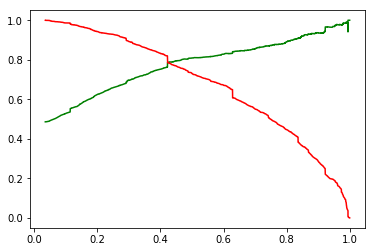

In [98]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Building Model on the test dataset

In [99]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])


In [100]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,...,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
3471,0.260676,1.095776,0.906701,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8628,-0.089225,-0.860307,0.359606,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4223,-1.138927,-0.931959,-1.281680,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8419,-0.439126,0.588842,-0.187489,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3318,-1.138927,-0.931959,-1.281680,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Model on test dataset

In [101]:
X_test_sm=sm.add_constant(X_test[col])

In [102]:
y_test_pred=res.predict(X_test_sm)

In [103]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [104]:
y_test_df = pd.DataFrame(y_test)

In [105]:
y_test_df['LeadId'] = y_test_df.index

In [106]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [107]:
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [108]:
y_test_pred_final.head()

,Converted,LeadId,0
0,1,3471,0.824981
1,0,8628,0.280078
2,1,4223,0.921889
3,1,8419,0.453803
4,0,3318,0.422161


In [109]:
# Renaming 
y_test_pred_final=y_test_pred_final.rename(columns={0:'Converted_prob'})

In [110]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)

In [111]:
y_test_pred_final.head()

,Converted,LeadId,Converted_prob
0,1,3471,0.824981
1,0,8628,0.280078
2,1,4223,0.921889
3,1,8419,0.453803
4,0,3318,0.422161


In [112]:
y_test_pred_final['final_prediction']=y_test_pred_final['Converted_prob'].apply(lambda x:1 if x>0.39 else 0)
y_test_pred_final.head()

,Converted,LeadId,Converted_prob,final_prediction
0,1,3471,0.824981,1
1,0,8628,0.280078,0
2,1,4223,0.921889,1
3,1,8419,0.453803,1
4,0,3318,0.422161,1


In [113]:
y_test_pred_final['Lead Score']=round(y_test_pred_final['Converted_prob']*100,0)
y_test_pred_final.head()

,Converted,LeadId,Converted_prob,final_prediction,Lead Score
0,1,3471,0.824981,1,82.0
1,0,8628,0.280078,0,28.0
2,1,4223,0.921889,1,92.0
3,1,8419,0.453803,1,45.0
4,0,3318,0.422161,1,42.0


In [114]:
# overall accuracy.
metrics.accuracy_score(y_test_pred_final['Converted'],y_test_pred_final['final_prediction'])

0.7844504021447721

In [115]:
confusion_final=metrics.confusion_matrix(y_test_pred_final['Converted'],y_test_pred_final['final_prediction'])
confusion_final

array([[681, 264],
       [138, 782]], dtype=int64)

In [116]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negative

In [117]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.85

In [118]:
#  calculate specificity
TN / float(TN+FP)

0.7206349206349206

In [119]:
recall_score(y_test_pred_final['Converted'],y_test_pred_final['final_prediction'])

0.85

In [120]:
precision_score(y_test_pred_final['Converted'],y_test_pred_final['final_prediction'])

0.7476099426386233

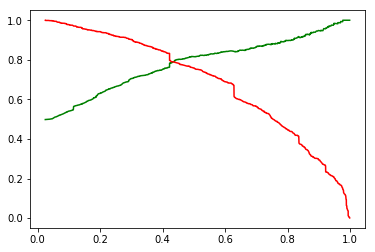

In [121]:
# precision recall curve
p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Conclusion
1. The top 3 that contribute for lead getting converted in the model are:
    1. lead_origin_Lead Add Form
    2. LastNotableActivity_Unreachable
    3. CurrentOccupation_Working Professional
2. We use Accuracy, sensitivity and specificity plot to find the optimal cut off for the model.
3. We get accuracy,sensitivity and specificity on train set as 79.10,78.12 and 81.09 percent.
4. Accuracy, Sensitivity and Specificity values of test set are around 78%,85% and 72%.
5. Recall score as 85% on test dataset.
6. Although above conditions state that model is good.